<a href="https://colab.research.google.com/github/CGS002543/Python-proyect/blob/main/Analisis%20%20tripulacion%20Titanic%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#analisis tripulacion Titanic

In [16]:
#IMPORTANDO LIBRERIAS NECESARIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
#cargando datos
df = pd.read_csv('info2.csv')

In [20]:
#mostrando datos
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# renombrando campos
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [23]:
df = df.rename(columns={
    'PassengerId': 'ID Pasajero',
    'Survived': 'Sobreviviente',
    'Pclass': 'Clase',
    'Name': 'Nombre',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'SibSp': 'Hermanos/Pareja a Bordo',
    'Parch': 'Padres/Hijos a Bordo',
    'Ticket': 'Boleto',
    'Fare': 'Tarifa',
    'Cabin': 'Cabina',
    'Embarked': 'Embarque'
})

In [25]:
#validando cambios
df.head()

,ID Pasajero,Sobreviviente,Clase,Nombre,Sexo,Edad,Hermanos/Pareja a Bordo,Padres/Hijos a Bordo,Boleto,Tarifa,Cabina,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


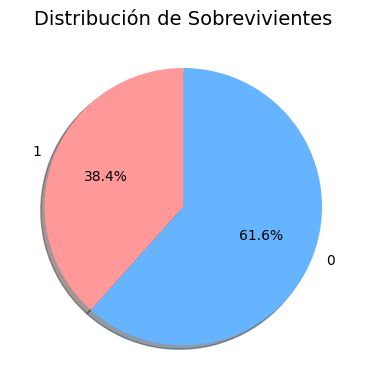

In [51]:
# Grafico sobreviciente
import matplotlib.pyplot as plt

# Contar valores de la columna 'Sobreviviente'
serie = df['Sobreviviente'].value_counts()

# Crear gráfico de pastel
plt.figure(figsize=(4, 4))  # Tamaño del gráfico
serie.plot.pie(
    autopct='%1.1f%%',       # Mostrar porcentajes con un decimal
    startangle=90,           # Empezar desde arriba
    counterclock=False,      # Sentido horario
    shadow=True,             # Sombra para efecto 3D
    colors=['#66b3ff', '#ff9999'],  # Colores personalizados (opcional)
    labels=serie.index       # Asegurar etiquetas legibles
)

plt.title('Distribución de Sobrevivientes', fontsize=14)
plt.ylabel('')  # Quitar etiqueta del eje Y para limpieza
plt.tight_layout()
plt.show()

<ipython-input-52-f7cbdfee1e6e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GrupoEdad', data=df, palette='hot_r')


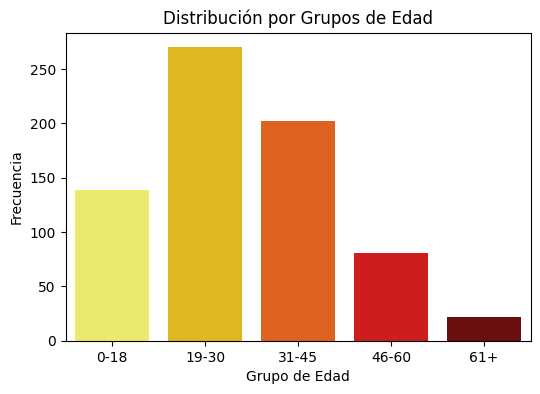

In [52]:
df['GrupoEdad'] = pd.cut(df['Edad'], bins=[0, 18, 30, 45, 60, 100],
                         labels=['0-18', '19-30', '31-45', '46-60', '61+'])

plt.figure(figsize=(6, 4))
sns.countplot(x='GrupoEdad', data=df, palette='hot_r')

plt.title('Distribución por Grupos de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-53-66d2764c5f4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Clase', data=df, palette='Set2')


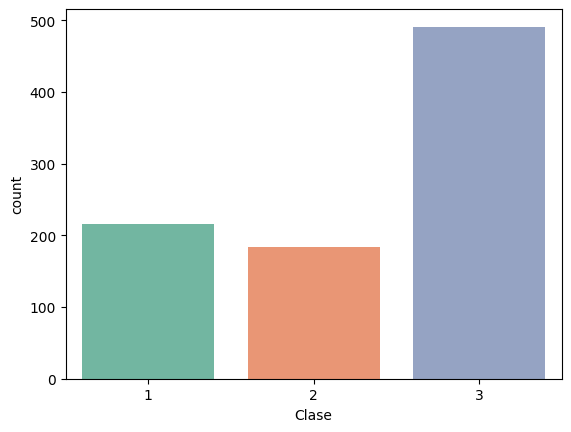

In [53]:
#diagrama por clases
sns.countplot(x='Clase', data=df, palette='Set2')
plt.show()

<ipython-input-48-38a477f958a9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sobreviviente', data=df, palette='hot_r')


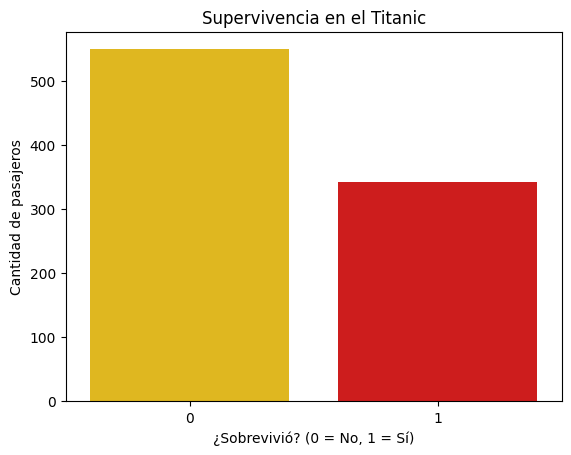

In [48]:
sns.countplot(x='Sobreviviente', data=df, palette='hot_r')
plt.title('Supervivencia en el Titanic')
plt.xlabel('¿Sobrevivió? (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de pasajeros')
plt.show()

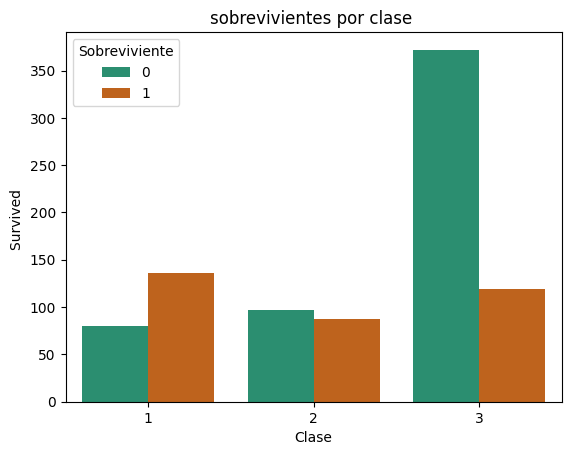

In [54]:
#barra de sobrevivientes y fallecidos  por clase
import seaborn as sns
grafico = sns.countplot(x='Clase',hue='Sobreviviente',palette='Dark2',data=df)
grafico.set(title='sobrevivientes por clase ',
xlabel='Clase', ylabel='Survived ')
plt.show()